In [549]:
import pandas as pd
import numpy as np
import scipy as sp

from numpy.testing import rundocs
import matplotlib.pyplot as plt
#import talib
import random
import sklearn
from sklearn import preprocessing
import tensorflow
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import seaborn as sns
import csv
#from datetime import strptime

In [550]:
le = preprocessing.LabelEncoder()

In [551]:
#df = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Sheet1')
#df.head(76)
df = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Sch_2')
df.head(10)

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun
0,Lingshui Semi,SEA CH,5,NOC,2,1,10439,EPC,700,3.100000,1,67166.666667,2,2,SEMI,980,2,0.148883,4,0.760000
1,Bohai Ming Zhu,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,1,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042
2,Petrojarl Varg,NE,1,OC,1,1,2240,EPC,816,0.460000,1,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765
3,Stybarrow Venture MV16,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,1,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875
4,Alima FPU,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,1,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133
5,Jangkrik,SEA,4,OC,2,1,8824,EPC,1052,2.676500,1,79400.000000,2,2,BARGE,120,2,0.055416,3,0.114068
6,Prelude,AUST/NZ,3,IOC,2,1,7814,EPC,2229,11.160000,1,148333.333333,6,5,FLNG,250,1,0.235955,5,0.243158
7,CLOV FPSO,AFRICA,3,IOC,2,1,7534,EPC,1383,7.000000,1,198333.333333,4,2,FPSO,1290,4,0.806723,5,0.007954
8,Dalia,AFRICA,4,IOC,2,1,4872,EPC,1306,3.400000,1,287000.000000,6,3,FPSO,1360,5,0.836237,2,0.010720
9,Girassol,AFRICA,4,IOC,2,1,3103,EPC,823,2.500000,1,246666.666667,5,3,FPSO,1350,1,0.810811,1,0.521264


In [552]:
print('mean', df['Schedule_Overrun'].mean())
print('median',df['Schedule_Overrun'].median())
print('max',df['Schedule_Overrun'].max())
print('min',df['Schedule_Overrun'].min())
print('std',df['Schedule_Overrun'].std())
Std3_9 =  3.9*df['Schedule_Overrun'].std()
Std3 =  3*df['Schedule_Overrun'].std()
Std2 =  2*df['Schedule_Overrun'].std()
print('2_std',Std2)
print('3_std',Std3)
print('3.9_std',Std3_9)
print(df.shape)
print('describe:',df.describe())

mean 0.2511606227247125
median 0.19644300727566694
max 1.929054054054054
min -0.14387464387464388
std 0.30387827064383305
2_std 0.6077565412876661
3_std 0.9116348119314992
3.9_std 1.1851252555109488
(127, 20)
describe:        Local Content Requirment (H,M,A,L, N)  Lease/ Own   Contract2  \
count                             127.000000  127.000000  127.000000   
mean                                3.204724    1.787402    1.346457   
std                                 1.471090    0.410766    0.770260   
min                                 1.000000    1.000000    0.000000   
25%                                 2.000000    2.000000    1.000000   
50%                                 3.000000    2.000000    1.000000   
75%                                 5.000000    2.000000    1.000000   
max                                 5.000000    2.000000    3.000000   

       Contracting Date  Planned_Duration  Planned_Cost   Hull Type  \
count        127.000000        127.000000    127.000000  127.

In [553]:
#df[df["Cost_Overrun"]==2.6800000000000006]
df[df["Schedule_Overrun"]>Std3]


,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun
60,Balder,NE,3,IOC,2,1,1826,TK,592,0.35,1,90500.000000,2,5,FPSO,125,1,0.917127,1,1.929054
91,Thunder Horse,GOM,3,IOC,2,1,4624,EPC,1098,5.00,1,283333.333333,6,5,SEMI,1830,1,0.882353,4,0.926230
100,Gumusut Semi,SEA,5,IOC,1,3,6588,EPC,1233,1.60,1,200000.000000,5,2,SEMI,1220,2,0.750000,3,0.999189


In [554]:
#df.drop([0,1])
#df.head(10)
print(df.shape)
df = df[df.Schedule_Overrun < Std3]
print(df.shape)

(127, 20)
(124, 20)


In [555]:
#df.drop([df["Cost_Overrun"]==2.6800000000000006], axis =0)
#df.drop([67,67])
print('mean', df['Schedule_Overrun'].mean())
print('median',df['Schedule_Overrun'].median())
print('max',df['Schedule_Overrun'].max())
print('min',df['Schedule_Overrun'].min())

mean 0.2261526334983535
median 0.19186547976863388
max 0.8792016806722689
min -0.14387464387464388


In [556]:
df= df.drop('Unit Name', axis = 1)
df.head(10)

,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun
0,SEA CH,5,NOC,2,1,10439,EPC,700,3.100000,1,67166.666667,2,2,SEMI,980,2,0.148883,4,0.760000
1,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,1,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042
2,NE,1,OC,1,1,2240,EPC,816,0.460000,1,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765
3,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,1,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875
4,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,1,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133
5,SEA,4,OC,2,1,8824,EPC,1052,2.676500,1,79400.000000,2,2,BARGE,120,2,0.055416,3,0.114068
6,AUST/NZ,3,IOC,2,1,7814,EPC,2229,11.160000,1,148333.333333,6,5,FLNG,250,1,0.235955,5,0.243158
7,AFRICA,3,IOC,2,1,7534,EPC,1383,7.000000,1,198333.333333,4,2,FPSO,1290,4,0.806723,5,0.007954
8,AFRICA,4,IOC,2,1,4872,EPC,1306,3.400000,1,287000.000000,6,3,FPSO,1360,5,0.836237,2,0.010720
9,AFRICA,4,IOC,2,1,3103,EPC,823,2.500000,1,246666.666667,5,3,FPSO,1350,1,0.810811,1,0.521264


In [557]:
dataset = df.values
print(dataset.shape)
Y = dataset[:,18]
df= df.drop('Schedule_Overrun', axis = 1)
print(Y)

(124, 19)
[0.76 0.47104247104247104 0.2867647058823529 -0.14387464387464388
 -0.022132796780684104 0.11406844106463879 0.24315836698070883
 0.007953723788864787 0.010719754977029096 0.5212636695018226
 0.4477335800185014 0.546462063086104 -0.1400560224089636
 -0.10163111668757842 -0.08406524466750313 0.1903914590747331
 0.29703763010408324 0.03654080389768575 0.06751054852320675
 0.015567765567765568 0.11367673179396093 0.07214121258633922
 0.707647628267183 0.2871473354231975 0.1933395004625347
 0.005591798695246971 0.3763625932300631 0.0019723865877712033
 0.14664804469273743 0.6635071090047393 0.43827859569648925
 0.3674846625766871 0.5299244625217897 0.3649122807017544
 0.3053691275167785 0.2551594746716698 0.20902090209020902
 0.33906922174423154 0.4278451310129057 0.18138424821002386
 0.059745347698334964 -0.04514889529298751 0.457280385078219
 -0.04279069767441861 -0.015084294587400177 0.18771998435666798
 0.5043186180422264 0.233201581027668 0.3889602053915276
 0.08676789587852

In [558]:

# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
#df.iloc[:,5:].head(5)
df.head(10)


,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",...,"Contract (EPC, CL, PS, TK)_EPC","Contract (EPC, CL, PS, TK)_PS","Contract (EPC, CL, PS, TK)_TK",Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP
0,5,2,1,10439,700,3.100000,1,67166.666667,2,2,...,1,0,0,0,0,0,0,1,0,0
1,5,2,1,4350,259,0.400000,1,40000.000000,1,2,...,1,0,0,0,0,1,0,0,0,0
2,1,1,1,2240,816,0.460000,1,65833.333333,2,2,...,1,0,0,0,0,1,0,0,0,0
3,3,1,3,5922,702,0.598425,1,87500.000000,2,3,...,1,0,0,0,0,1,0,0,0,0
4,2,2,1,5720,994,1.133000,1,100000.000000,3,1,...,1,0,0,1,0,0,0,0,0,0
5,4,2,1,8824,1052,2.676500,1,79400.000000,2,2,...,1,0,0,1,0,0,0,0,0,0
6,3,2,1,7814,2229,11.160000,1,148333.333333,6,5,...,1,0,0,0,1,0,0,0,0,0
7,3,2,1,7534,1383,7.000000,1,198333.333333,4,2,...,1,0,0,0,0,1,0,0,0,0
8,4,2,1,4872,1306,3.400000,1,287000.000000,6,3,...,1,0,0,0,0,1,0,0,0,0
9,4,2,1,3103,823,2.500000,1,246666.666667,5,3,...,1,0,0,0,0,1,0,0,0,0


In [559]:
print(df.shape)

(124, 36)


In [560]:
df['Schedule_Overrun'] = Y

print(df.shape)

(124, 37)


In [561]:
print(Y)

[0.76 0.47104247104247104 0.2867647058823529 -0.14387464387464388
 -0.022132796780684104 0.11406844106463879 0.24315836698070883
 0.007953723788864787 0.010719754977029096 0.5212636695018226
 0.4477335800185014 0.546462063086104 -0.1400560224089636
 -0.10163111668757842 -0.08406524466750313 0.1903914590747331
 0.29703763010408324 0.03654080389768575 0.06751054852320675
 0.015567765567765568 0.11367673179396093 0.07214121258633922
 0.707647628267183 0.2871473354231975 0.1933395004625347
 0.005591798695246971 0.3763625932300631 0.0019723865877712033
 0.14664804469273743 0.6635071090047393 0.43827859569648925
 0.3674846625766871 0.5299244625217897 0.3649122807017544
 0.3053691275167785 0.2551594746716698 0.20902090209020902
 0.33906922174423154 0.4278451310129057 0.18138424821002386
 0.059745347698334964 -0.04514889529298751 0.457280385078219
 -0.04279069767441861 -0.015084294587400177 0.18771998435666798
 0.5043186180422264 0.233201581027668 0.3889602053915276
 0.08676789587852494 0.3909

In [562]:
df

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",...,"Contract (EPC, CL, PS, TK)_PS","Contract (EPC, CL, PS, TK)_TK",Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Schedule_Overrun
0,5,2,1,10439,700,3.100000,1,67166.666667,2,2,...,0,0,0,0,0,0,1,0,0,0.76
1,5,2,1,4350,259,0.400000,1,40000.000000,1,2,...,0,0,0,0,1,0,0,0,0,0.471042
2,1,1,1,2240,816,0.460000,1,65833.333333,2,2,...,0,0,0,0,1,0,0,0,0,0.286765
3,3,1,3,5922,702,0.598425,1,87500.000000,2,3,...,0,0,0,0,1,0,0,0,0,-0.143875
4,2,2,1,5720,994,1.133000,1,100000.000000,3,1,...,0,0,1,0,0,0,0,0,0,-0.0221328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,2,1,6001,1119,4.410000,1,116666.666667,3,2,...,0,0,0,0,0,0,0,0,1,-0.0884718
123,1,2,1,1381,1098,1.200000,1,230833.333333,5,2,...,0,0,0,0,0,0,0,0,1,-0.0901639
124,1,2,1,7729,1202,3.000000,1,116666.666667,3,2,...,0,0,0,0,0,0,0,0,1,-0.125624
125,1,2,1,2398,1040,1.450000,1,216666.666667,5,3,...,0,0,0,0,0,0,0,0,1,-0.0817308


In [563]:
pd.to_numeric(df['Schedule_Overrun'])
df['Schedule_Overrun'].astype(str).astype(float)
#df['Schedule_Overrun']
df['Schedule_Overrun'] = pd.to_numeric(df['Schedule_Overrun'],errors='coerce')
df.dtypes['Schedule_Overrun']


dtype('float64')

In [564]:
df2=df
df2

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",...,"Contract (EPC, CL, PS, TK)_PS","Contract (EPC, CL, PS, TK)_TK",Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Schedule_Overrun
0,5,2,1,10439,700,3.100000,1,67166.666667,2,2,...,0,0,0,0,0,0,1,0,0,0.760000
1,5,2,1,4350,259,0.400000,1,40000.000000,1,2,...,0,0,0,0,1,0,0,0,0,0.471042
2,1,1,1,2240,816,0.460000,1,65833.333333,2,2,...,0,0,0,0,1,0,0,0,0,0.286765
3,3,1,3,5922,702,0.598425,1,87500.000000,2,3,...,0,0,0,0,1,0,0,0,0,-0.143875
4,2,2,1,5720,994,1.133000,1,100000.000000,3,1,...,0,0,1,0,0,0,0,0,0,-0.022133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,2,1,6001,1119,4.410000,1,116666.666667,3,2,...,0,0,0,0,0,0,0,0,1,-0.088472
123,1,2,1,1381,1098,1.200000,1,230833.333333,5,2,...,0,0,0,0,0,0,0,0,1,-0.090164
124,1,2,1,7729,1202,3.000000,1,116666.666667,3,2,...,0,0,0,0,0,0,0,0,1,-0.125624
125,1,2,1,2398,1040,1.450000,1,216666.666667,5,3,...,0,0,0,0,0,0,0,0,1,-0.081731


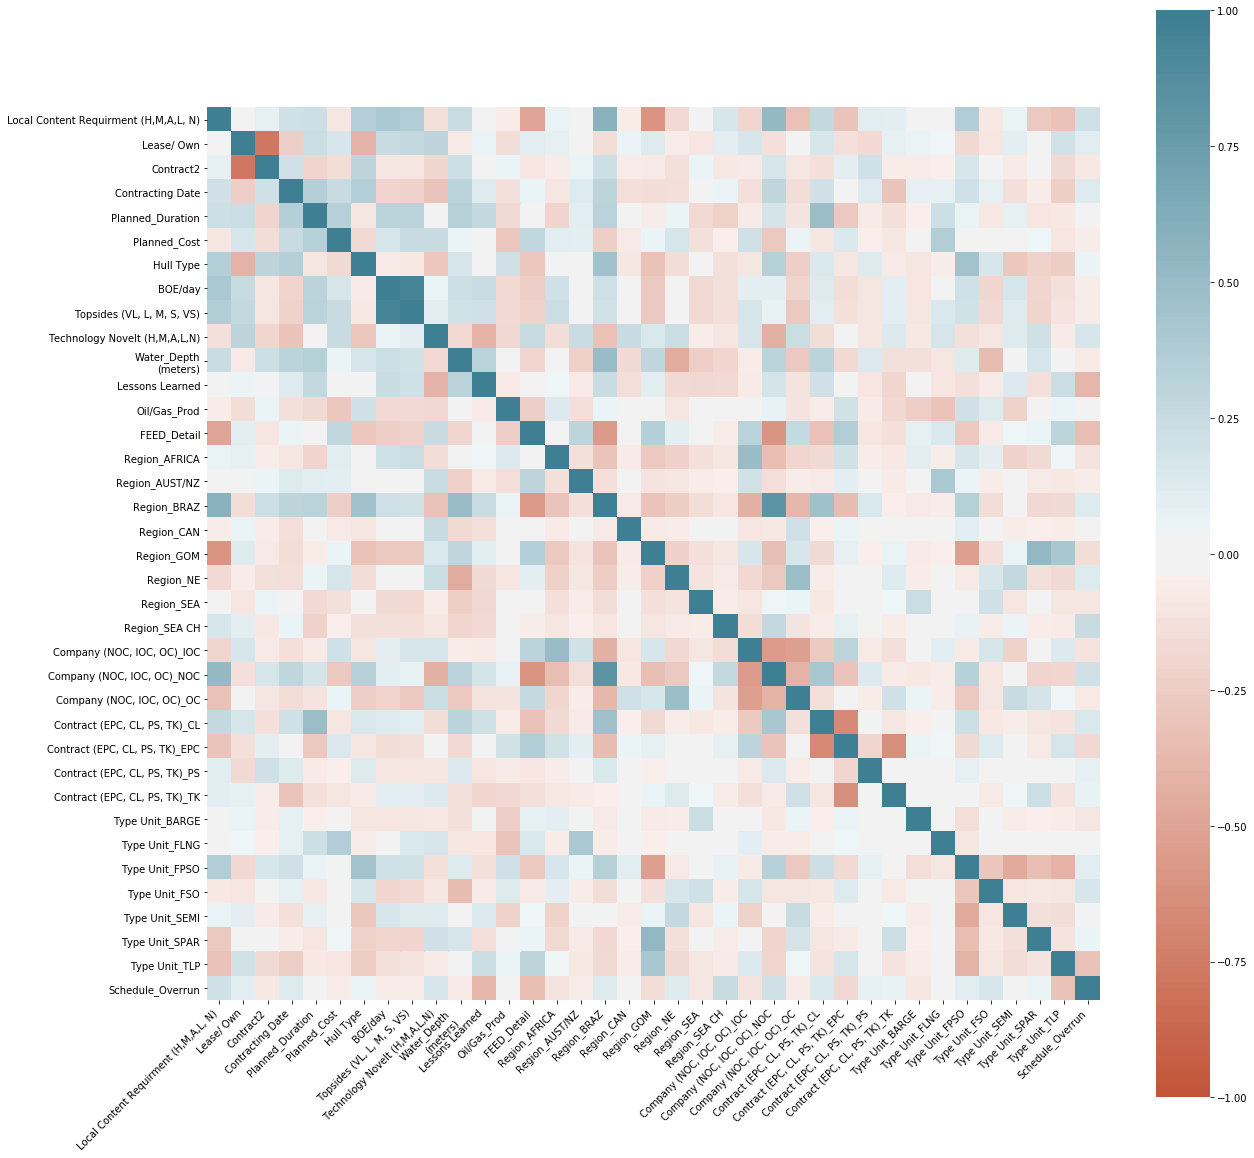

In [565]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

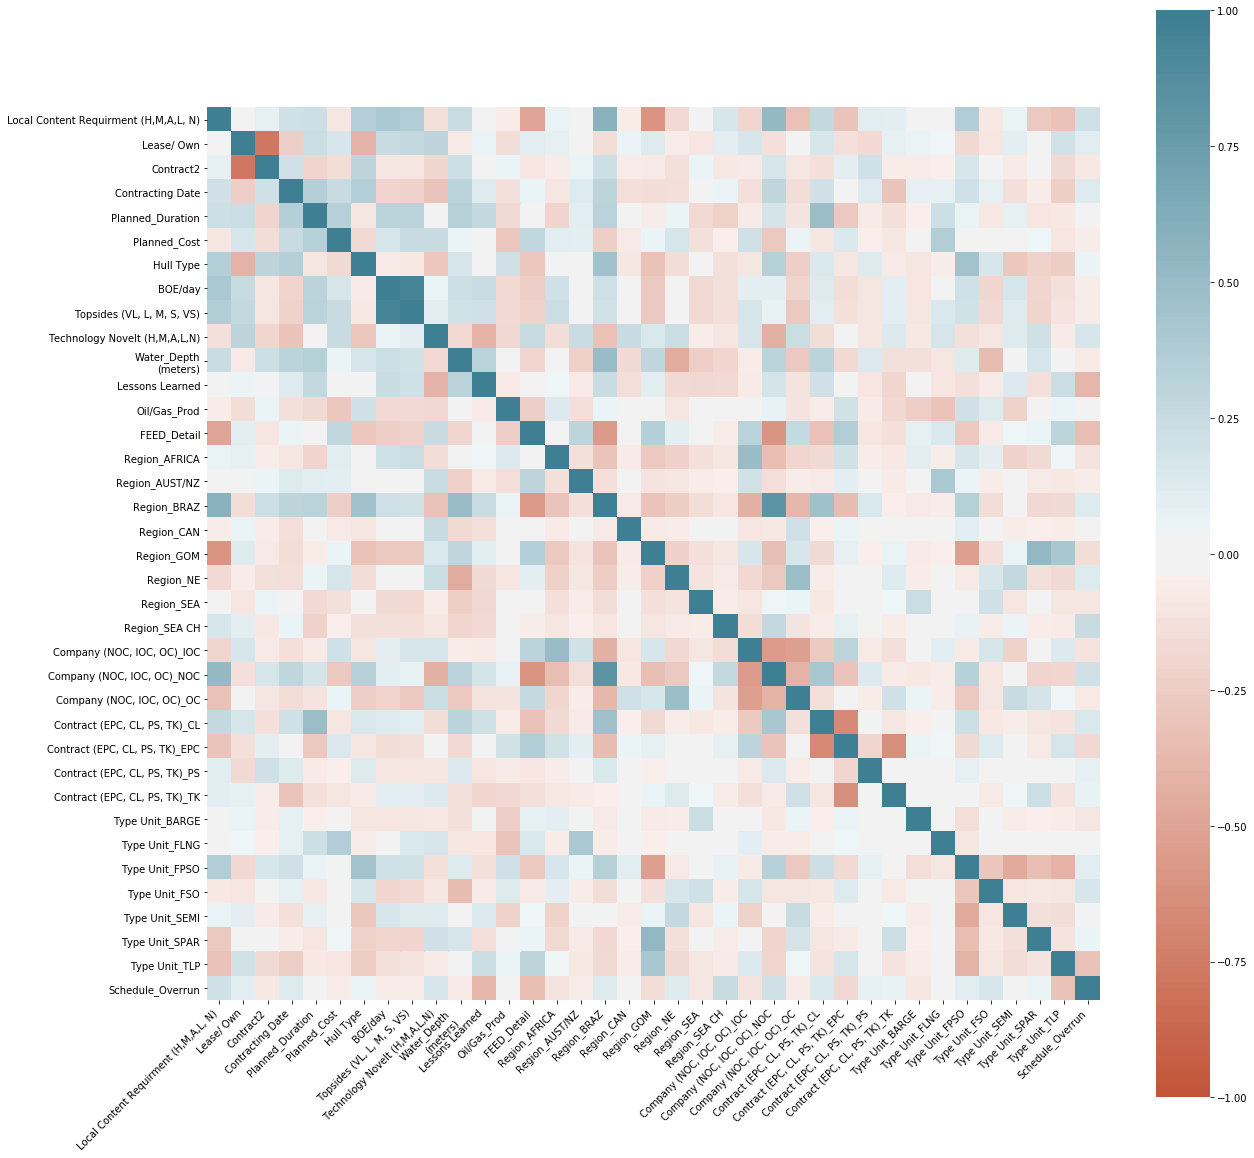

In [566]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [567]:
df.corr(method ='pearson')

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",...,"Contract (EPC, CL, PS, TK)_PS","Contract (EPC, CL, PS, TK)_TK",Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Schedule_Overrun
"Local Content Requirment (H,M,A,L, N)",1.000000,0.027317,0.078185,0.195892,0.222175,-0.086451,0.354177,0.398567,0.363514,-0.132704,...,0.110515,0.101773,-0.016814,-0.011841,0.359552,-0.079032,0.070150,-0.271910,-0.317194,0.204014
Lease/ Own,0.027317,1.000000,-0.786215,-0.236899,0.233233,0.165378,-0.407387,0.251417,0.266547,0.312178,...,-0.175055,0.079797,0.065949,0.046443,-0.180730,-0.106652,0.099778,0.021352,0.191076,0.116818
Contract2,0.078185,-0.786215,1.000000,0.202845,-0.205245,-0.151574,0.305022,-0.086489,-0.098530,-0.199589,...,0.196888,-0.053998,-0.057002,-0.040142,0.162776,0.012527,-0.063094,0.010222,-0.165153,-0.084245
Contracting Date,0.195892,-0.236899,0.202845,1.000000,0.351832,0.254975,0.354339,-0.205998,-0.212550,-0.309855,...,0.130882,-0.305369,0.080996,0.080417,0.205602,0.081709,-0.133828,-0.049012,-0.240837,0.128776
Planned_Duration,0.222175,0.233233,-0.205245,0.351832,1.000000,0.349849,-0.095672,0.320179,0.327667,-0.026833,...,-0.067532,-0.125400,-0.039374,0.222290,0.068198,-0.085211,0.079034,-0.101881,-0.082009,-0.011339
Planned_Cost,-0.086451,0.165378,-0.151574,0.254975,0.349849,1.000000,-0.165272,0.178628,0.251371,0.250071,...,-0.046328,-0.093498,-0.014086,0.362520,-0.036295,-0.012382,0.032005,0.044775,-0.102980,-0.055486
Hull Type,0.354177,-0.407387,0.305022,0.354339,-0.095672,-0.165272,1.000000,-0.063625,-0.084838,-0.288882,...,0.130664,-0.077664,-0.088354,-0.062221,0.442468,0.169894,-0.284363,-0.215302,-0.255990,0.052130
BOE/day,0.398567,0.251417,-0.086489,-0.205998,0.320179,0.178628,-0.063625,1.000000,0.945819,0.056127,...,-0.095165,0.107884,-0.107957,-0.007461,0.210914,-0.201248,0.158794,-0.193804,-0.128521,-0.053470
"Topsides (VL, L, M, S, VS)",0.363514,0.266547,-0.098530,-0.212550,0.327667,0.251371,-0.084838,0.945819,1.000000,0.100226,...,-0.101011,0.090180,-0.097830,0.155919,0.190710,-0.177272,0.125471,-0.208085,-0.116078,-0.056887
"Technology Novelt (H,M,A,L,N)",-0.132704,0.312178,-0.199589,-0.309855,-0.026833,0.250071,-0.288882,0.056127,0.100226,1.000000,...,-0.093954,0.138967,-0.085042,0.178568,-0.124536,-0.100016,0.124158,0.210689,-0.068870,0.169619


In [568]:
dataset = df.values

In [569]:
dataset


array([[ 5.        ,  2.        ,  1.        , ...,  0.        ,
         0.        ,  0.76      ],
       [ 5.        ,  2.        ,  1.        , ...,  0.        ,
         0.        ,  0.47104247],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.28676471],
       ...,
       [ 1.        ,  2.        ,  1.        , ...,  0.        ,
         1.        , -0.12562396],
       [ 1.        ,  2.        ,  1.        , ...,  0.        ,
         1.        , -0.08173077],
       [ 1.        ,  2.        ,  1.        , ...,  0.        ,
         1.        ,  0.01530055]])

In [570]:
X = dataset[:,1:36]

In [571]:
X

array([[2.0000e+00, 1.0000e+00, 1.0439e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.0000e+00, 4.3500e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.2400e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 1.0000e+00, 7.7290e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 1.0000e+00, 2.3980e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.8850e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [572]:
Y = dataset[:,36]

In [573]:
Y

array([ 0.76      ,  0.47104247,  0.28676471, -0.14387464, -0.0221328 ,
        0.11406844,  0.24315837,  0.00795372,  0.01071975,  0.52126367,
        0.44773358,  0.54646206, -0.14005602, -0.10163112, -0.08406524,
        0.19039146,  0.29703763,  0.0365408 ,  0.06751055,  0.01556777,
        0.11367673,  0.07214121,  0.70764763,  0.28714734,  0.1933395 ,
        0.0055918 ,  0.37636259,  0.00197239,  0.14664804,  0.66350711,
        0.4382786 ,  0.36748466,  0.52992446,  0.36491228,  0.30536913,
        0.25515947,  0.2090209 ,  0.33906922,  0.42784513,  0.18138425,
        0.05974535, -0.0451489 ,  0.45728039, -0.0427907 , -0.01508429,
        0.18771998,  0.50431862,  0.23320158,  0.38896021,  0.0867679 ,
        0.39095206,  0.24777637,  0.24468085,  0.22646851,  0.05204778,
        0.27897839,  0.39412273,  0.0724166 ,  0.11227154,  0.20804598,
        0.72360704,  0.85655738, -0.12518741,  0.73493976,  0.16285211,
        0.16675218,  0.87920168,  0.058927  , -0.01597444,  0.35

In [574]:
from sklearn import preprocessing

In [575]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [576]:
X_scale

array([[1.        , 0.33333333, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.40021671, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.19237589, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.73305753, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.33333333, 0.20793932, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.33333333, 0.15740741, ..., 0.        , 0.        ,
        1.        ]])

In [577]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [578]:
#Y_scale

In [579]:
from sklearn.feature_extraction import DictVectorizer

In [580]:
from sklearn.model_selection import train_test_split

In [581]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [582]:
print(X.shape)
print(Y.shape)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

(124, 35)
(124,)


In [583]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(86, 35) (19, 35) (19, 35) (86,) (19,) (19,)


In [584]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [585]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [586]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [595]:
for train, test in kfold.split(X_scale, Y):
# create model
	model2 = Sequential()
	model2.add(Dense(35, input_dim=35, activation='relu'))
	model2.add(Dense(70, activation='relu'))
	model2.add(Dense(35, activation='relu'))
	model2.add(Dense(7, activation='relu'))
	model2.add(Dense(1, activation='sigmoid'))
	# Compile model
	model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model2.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 1.80%
accuracy: 1.80%
accuracy: 1.80%
accuracy: 1.80%
accuracy: 1.79%
accuracy: 1.79%
accuracy: 0.00%
accuracy: 1.79%
accuracy: 1.79%
accuracy: 1.79%
1.61% (+/- 0.54%)


In [596]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model3 = Sequential([
        Dense(35, activation='sigmoid', input_shape=(35,)),
        Dense(70, activation='sigmoid'),
        Dense(35, activation='sigmoid'),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model3.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model3.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model3.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))    


Train on 86 samples, validate on 19 samples
Epoch 1/400
86/86 [==============================] - 1s 9ms/step - loss: 0.1437 - accuracy: 0.0000e+00 - val_loss: 0.1690 - val_accuracy: 0.0000e+00
Epoch 2/400
86/86 [==============================] - 0s 346us/step - loss: 0.1355 - accuracy: 0.0000e+00 - val_loss: 0.1604 - val_accuracy: 0.0000e+00
Epoch 3/400
86/86 [==============================] - 0s 350us/step - loss: 0.1284 - accuracy: 0.0233 - val_loss: 0.1528 - val_accuracy: 0.0000e+00
Epoch 4/400
86/86 [==============================] - 0s 328us/step - loss: 0.1221 - accuracy: 0.0233 - val_loss: 0.1455 - val_accuracy: 0.0000e+00
Epoch 5/400
86/86 [==============================] - 0s 343us/step - loss: 0.1162 - accuracy: 0.0233 - val_loss: 0.1389 - val_accuracy: 0.0000e+00
Epoch 6/400
86/86 [==============================] - 0s 338us/step - loss: 0.1109 - accuracy: 0.0233 - val_loss: 0.1333 - val_accuracy: 0.0000e+00
Epoch 7/400
86/86 [==============================] - 0s 337us/step -

86/86 [==============================] - 0s 315us/step - loss: 0.0621 - accuracy: 0.0233 - val_loss: 0.0715 - val_accuracy: 0.0000e+00
Epoch 57/400
86/86 [==============================] - 0s 267us/step - loss: 0.0621 - accuracy: 0.0233 - val_loss: 0.0714 - val_accuracy: 0.0000e+00
Epoch 58/400
86/86 [==============================] - 0s 262us/step - loss: 0.0620 - accuracy: 0.0233 - val_loss: 0.0712 - val_accuracy: 0.0000e+00
Epoch 59/400
86/86 [==============================] - 0s 291us/step - loss: 0.0619 - accuracy: 0.0233 - val_loss: 0.0711 - val_accuracy: 0.0000e+00
Epoch 60/400
86/86 [==============================] - 0s 280us/step - loss: 0.0619 - accuracy: 0.0233 - val_loss: 0.0709 - val_accuracy: 0.0000e+00
Epoch 61/400
86/86 [==============================] - 0s 282us/step - loss: 0.0618 - accuracy: 0.0233 - val_loss: 0.0708 - val_accuracy: 0.0000e+00
Epoch 62/400
86/86 [==============================] - 0s 274us/step - loss: 0.0618 - accuracy: 0.0233 - val_loss: 0.0708 - va

86/86 [==============================] - 0s 265us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 112/400
86/86 [==============================] - 0s 260us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 113/400
86/86 [==============================] - 0s 262us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 114/400
86/86 [==============================] - 0s 268us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 115/400
86/86 [==============================] - 0s 262us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 116/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 117/400
86/86 [==============================] - 0s 312us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.068

86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 167/400
86/86 [==============================] - 0s 267us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 168/400
86/86 [==============================] - 0s 264us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 169/400
86/86 [==============================] - 0s 262us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 170/400
86/86 [==============================] - 0s 260us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 171/400
86/86 [==============================] - 0s 262us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 172/400
86/86 [==============================] - 0s 268us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 222/400
86/86 [==============================] - 0s 266us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 223/400
86/86 [==============================] - 0s 270us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 224/400
86/86 [==============================] - 0s 309us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 225/400
86/86 [==============================] - 0s 299us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 226/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 227/400
86/86 [==============================] - 0s 307us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 371us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 277/400
86/86 [==============================] - 0s 505us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 278/400
86/86 [==============================] - 0s 338us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 279/400
86/86 [==============================] - 0s 363us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 280/400
86/86 [==============================] - 0s 397us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 281/400
86/86 [==============================] - 0s 476us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 282/400
86/86 [==============================] - 0s 456us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 579us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 332/400
86/86 [==============================] - 0s 559us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 333/400
86/86 [==============================] - 0s 418us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 334/400
86/86 [==============================] - 0s 336us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 335/400
86/86 [==============================] - 0s 393us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 336/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 337/400
86/86 [==============================] - 0s 377us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 328us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 387/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 388/400
86/86 [==============================] - 0s 305us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 389/400
86/86 [==============================] - 0s 564us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 390/400
86/86 [==============================] - 0s 496us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 391/400
86/86 [==============================] - 0s 442us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 392/400
86/86 [==============================] - 0s 411us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 342us/step - loss: 0.0620 - accuracy: 0.0233 - val_loss: 0.0713 - val_accuracy: 0.0000e+00
Epoch 42/400
86/86 [==============================] - 0s 310us/step - loss: 0.0620 - accuracy: 0.0233 - val_loss: 0.0712 - val_accuracy: 0.0000e+00
Epoch 43/400
86/86 [==============================] - 0s 306us/step - loss: 0.0619 - accuracy: 0.0233 - val_loss: 0.0710 - val_accuracy: 0.0000e+00
Epoch 44/400
86/86 [==============================] - 0s 343us/step - loss: 0.0618 - accuracy: 0.0233 - val_loss: 0.0709 - val_accuracy: 0.0000e+00
Epoch 45/400
86/86 [==============================] - 0s 303us/step - loss: 0.0618 - accuracy: 0.0233 - val_loss: 0.0708 - val_accuracy: 0.0000e+00
Epoch 46/400
86/86 [==============================] - 0s 450us/step - loss: 0.0617 - accuracy: 0.0233 - val_loss: 0.0706 - val_accuracy: 0.0000e+00
Epoch 47/400
86/86 [==============================] - 0s 276us/step - loss: 0.0617 - accuracy: 0.0233 - val_loss: 0.0705 - va

86/86 [==============================] - 0s 566us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 97/400
86/86 [==============================] - 0s 552us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 98/400
86/86 [==============================] - 0s 514us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 99/400
86/86 [==============================] - 0s 552us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 100/400
86/86 [==============================] - 0s 412us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 101/400
86/86 [==============================] - 0s 300us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 102/400
86/86 [==============================] - 0s 356us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 -

86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 152/400
86/86 [==============================] - 0s 338us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 153/400
86/86 [==============================] - 0s 364us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 154/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 155/400
86/86 [==============================] - 0s 334us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 156/400
86/86 [==============================] - 0s 404us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 157/400
86/86 [==============================] - 0s 350us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 303us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 207/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 208/400
86/86 [==============================] - 0s 284us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 209/400
86/86 [==============================] - 0s 322us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 210/400
86/86 [==============================] - 0s 322us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 211/400
86/86 [==============================] - 0s 332us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 212/400
86/86 [==============================] - 0s 337us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 262/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 263/400
86/86 [==============================] - 0s 260us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 264/400
86/86 [==============================] - 0s 329us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 265/400
86/86 [==============================] - 0s 302us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 266/400
86/86 [==============================] - 0s 269us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 267/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 317/400
86/86 [==============================] - 0s 314us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 318/400
86/86 [==============================] - 0s 368us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 319/400
86/86 [==============================] - 0s 310us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 320/400
86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 321/400
86/86 [==============================] - 0s 305us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 322/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 369us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 372/400
86/86 [==============================] - 0s 407us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 373/400
86/86 [==============================] - 0s 353us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 374/400
86/86 [==============================] - 0s 340us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 375/400
86/86 [==============================] - 0s 327us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 376/400
86/86 [==============================] - 0s 386us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 377/400
86/86 [==============================] - 0s 311us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 318us/step - loss: 0.0684 - accuracy: 0.0233 - val_loss: 0.0818 - val_accuracy: 0.0000e+00
Epoch 27/400
86/86 [==============================] - 0s 333us/step - loss: 0.0678 - accuracy: 0.0233 - val_loss: 0.0809 - val_accuracy: 0.0000e+00
Epoch 28/400
86/86 [==============================] - 0s 291us/step - loss: 0.0672 - accuracy: 0.0233 - val_loss: 0.0802 - val_accuracy: 0.0000e+00
Epoch 29/400
86/86 [==============================] - 0s 308us/step - loss: 0.0668 - accuracy: 0.0233 - val_loss: 0.0795 - val_accuracy: 0.0000e+00
Epoch 30/400
86/86 [==============================] - 0s 348us/step - loss: 0.0664 - accuracy: 0.0233 - val_loss: 0.0788 - val_accuracy: 0.0000e+00
Epoch 31/400
86/86 [==============================] - 0s 316us/step - loss: 0.0659 - accuracy: 0.0233 - val_loss: 0.0782 - val_accuracy: 0.0000e+00
Epoch 32/400
86/86 [==============================] - 0s 321us/step - loss: 0.0656 - accuracy: 0.0233 - val_loss: 0.0777 - va

86/86 [==============================] - 0s 459us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0687 - val_accuracy: 0.0000e+00
Epoch 82/400
86/86 [==============================] - 0s 392us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 83/400
86/86 [==============================] - 0s 327us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 84/400
86/86 [==============================] - 0s 285us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 85/400
86/86 [==============================] - 0s 289us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 86/400
86/86 [==============================] - 0s 278us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - val_accuracy: 0.0000e+00
Epoch 87/400
86/86 [==============================] - 0s 274us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - va

86/86 [==============================] - 0s 316us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 137/400
86/86 [==============================] - 0s 360us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 138/400
86/86 [==============================] - 0s 374us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 139/400
86/86 [==============================] - 0s 362us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 140/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 141/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 142/400
86/86 [==============================] - 0s 303us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 192/400
86/86 [==============================] - 0s 303us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 193/400
86/86 [==============================] - 0s 271us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 194/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 195/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 196/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 197/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 247/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 248/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 249/400
86/86 [==============================] - 0s 356us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 250/400
86/86 [==============================] - 0s 337us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 251/400
86/86 [==============================] - 0s 319us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 252/400
86/86 [==============================] - 0s 338us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 308us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 302/400
86/86 [==============================] - 0s 360us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 303/400
86/86 [==============================] - 0s 343us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 304/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 305/400
86/86 [==============================] - 0s 301us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 306/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 307/400
86/86 [==============================] - 0s 278us/step - loss: 0.0608 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 357/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 358/400
86/86 [==============================] - 0s 265us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 359/400
86/86 [==============================] - 0s 262us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 360/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 361/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 362/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

Epoch 11/400
86/86 [==============================] - 0s 277us/step - loss: 0.0666 - accuracy: 0.0233 - val_loss: 0.0792 - val_accuracy: 0.0000e+00
Epoch 12/400
86/86 [==============================] - 0s 301us/step - loss: 0.0663 - accuracy: 0.0233 - val_loss: 0.0787 - val_accuracy: 0.0000e+00
Epoch 13/400
86/86 [==============================] - 0s 290us/step - loss: 0.0660 - accuracy: 0.0233 - val_loss: 0.0783 - val_accuracy: 0.0000e+00
Epoch 14/400
86/86 [==============================] - 0s 280us/step - loss: 0.0657 - accuracy: 0.0233 - val_loss: 0.0778 - val_accuracy: 0.0000e+00
Epoch 15/400
86/86 [==============================] - 0s 286us/step - loss: 0.0654 - accuracy: 0.0233 - val_loss: 0.0774 - val_accuracy: 0.0000e+00
Epoch 16/400
86/86 [==============================] - 0s 277us/step - loss: 0.0652 - accuracy: 0.0233 - val_loss: 0.0769 - val_accuracy: 0.0000e+00
Epoch 17/400
86/86 [==============================] - 0s 285us/step - loss: 0.0649 - accuracy: 0.0233 - val_loss

86/86 [==============================] - 0s 316us/step - loss: 0.0612 - accuracy: 0.0233 - val_loss: 0.0691 - val_accuracy: 0.0000e+00
Epoch 67/400
86/86 [==============================] - 0s 301us/step - loss: 0.0612 - accuracy: 0.0233 - val_loss: 0.0690 - val_accuracy: 0.0000e+00
Epoch 68/400
86/86 [==============================] - 0s 280us/step - loss: 0.0612 - accuracy: 0.0233 - val_loss: 0.0690 - val_accuracy: 0.0000e+00
Epoch 69/400
86/86 [==============================] - 0s 292us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 70/400
86/86 [==============================] - 0s 284us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 71/400
86/86 [==============================] - 0s 285us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0688 - val_accuracy: 0.0000e+00
Epoch 72/400
86/86 [==============================] - 0s 329us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0688 - va

86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 122/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 123/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 124/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 125/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 126/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 127/400
86/86 [==============================] - 0s 311us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 296us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 177/400
86/86 [==============================] - 0s 322us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 178/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 179/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 180/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 181/400
86/86 [==============================] - 0s 290us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 182/400
86/86 [==============================] - 0s 323us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 329us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 232/400
86/86 [==============================] - 0s 312us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 233/400
86/86 [==============================] - 0s 318us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 234/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 235/400
86/86 [==============================] - 0s 318us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 236/400
86/86 [==============================] - 0s 312us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 237/400
86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 294us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 287/400
86/86 [==============================] - 0s 284us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 288/400
86/86 [==============================] - 0s 332us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 289/400
86/86 [==============================] - 0s 301us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 290/400
86/86 [==============================] - 0s 294us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 291/400
86/86 [==============================] - 0s 311us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 292/400
86/86 [==============================] - 0s 313us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 342/400
86/86 [==============================] - 0s 309us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 343/400
86/86 [==============================] - 0s 314us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 344/400
86/86 [==============================] - 0s 312us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 345/400
86/86 [==============================] - 0s 318us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 346/400
86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 347/400
86/86 [==============================] - 0s 302us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 299us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 397/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 398/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 399/400
86/86 [==============================] - 0s 309us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 400/400
86/86 [==============================] - 0s 296us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Train on 86 samples, validate on 19 samples
Epoch 1/400
86/86 [==============================] - 1s 8ms/step - loss: 0.0973 - accuracy: 0.0233 - val_loss: 0.1178 - val_accuracy: 0.0000e+00
Epoch 2/400
86/86 [==============================] - 0s 386us/step - loss: 0.094

86/86 [==============================] - 0s 282us/step - loss: 0.0617 - accuracy: 0.0233 - val_loss: 0.0707 - val_accuracy: 0.0000e+00
Epoch 52/400
86/86 [==============================] - 0s 297us/step - loss: 0.0617 - accuracy: 0.0233 - val_loss: 0.0705 - val_accuracy: 0.0000e+00
Epoch 53/400
86/86 [==============================] - 0s 264us/step - loss: 0.0617 - accuracy: 0.0233 - val_loss: 0.0704 - val_accuracy: 0.0000e+00
Epoch 54/400
86/86 [==============================] - 0s 286us/step - loss: 0.0616 - accuracy: 0.0233 - val_loss: 0.0703 - val_accuracy: 0.0000e+00
Epoch 55/400
86/86 [==============================] - 0s 299us/step - loss: 0.0616 - accuracy: 0.0233 - val_loss: 0.0702 - val_accuracy: 0.0000e+00
Epoch 56/400
86/86 [==============================] - 0s 318us/step - loss: 0.0615 - accuracy: 0.0233 - val_loss: 0.0701 - val_accuracy: 0.0000e+00
Epoch 57/400
86/86 [==============================] - 0s 284us/step - loss: 0.0615 - accuracy: 0.0233 - val_loss: 0.0701 - va

86/86 [==============================] - 0s 309us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 107/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 108/400
86/86 [==============================] - 0s 270us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 109/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 110/400
86/86 [==============================] - 0s 301us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 111/400
86/86 [==============================] - 0s 267us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 112/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

Epoch 161/400
86/86 [==============================] - 0s 283us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 162/400
86/86 [==============================] - 0s 326us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 163/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 164/400
86/86 [==============================] - 0s 300us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 165/400
86/86 [==============================] - 0s 265us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 166/400
86/86 [==============================] - 0s 316us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 167/400
86/86 [==============================] - 0s 330us/step - loss: 0.0609 - accuracy: 0.0233 - v

Epoch 216/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 217/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 218/400
86/86 [==============================] - 0s 301us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 219/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 220/400
86/86 [==============================] - 0s 353us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 221/400
86/86 [==============================] - 0s 371us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 222/400
86/86 [==============================] - 0s 379us/step - loss: 0.0609 - accuracy: 0.0233 - v

Epoch 271/400
86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 272/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 273/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 274/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 275/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 276/400
86/86 [==============================] - 0s 301us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 277/400
86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - v

Epoch 326/400
86/86 [==============================] - 0s 305us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 327/400
86/86 [==============================] - 0s 305us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 328/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 329/400
86/86 [==============================] - 0s 284us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 330/400
86/86 [==============================] - 0s 301us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 331/400
86/86 [==============================] - 0s 277us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 332/400
86/86 [==============================] - 0s 298us/step - loss: 0.0609 - accuracy: 0.0233 - v

Epoch 381/400
86/86 [==============================] - 0s 418us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 382/400
86/86 [==============================] - 0s 322us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 383/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 384/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 385/400
86/86 [==============================] - 0s 308us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 386/400
86/86 [==============================] - 0s 277us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 387/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - v

86/86 [==============================] - 0s 296us/step - loss: 0.0921 - accuracy: 0.0233 - val_loss: 0.1124 - val_accuracy: 0.0000e+00
Epoch 36/400
86/86 [==============================] - 0s 287us/step - loss: 0.0904 - accuracy: 0.0233 - val_loss: 0.1103 - val_accuracy: 0.0000e+00
Epoch 37/400
86/86 [==============================] - 0s 287us/step - loss: 0.0888 - accuracy: 0.0233 - val_loss: 0.1082 - val_accuracy: 0.0000e+00
Epoch 38/400
86/86 [==============================] - 0s 289us/step - loss: 0.0871 - accuracy: 0.0233 - val_loss: 0.1064 - val_accuracy: 0.0000e+00
Epoch 39/400
86/86 [==============================] - 0s 276us/step - loss: 0.0857 - accuracy: 0.0233 - val_loss: 0.1046 - val_accuracy: 0.0000e+00
Epoch 40/400
86/86 [==============================] - 0s 301us/step - loss: 0.0844 - accuracy: 0.0233 - val_loss: 0.1029 - val_accuracy: 0.0000e+00
Epoch 41/400
86/86 [==============================] - 0s 367us/step - loss: 0.0830 - accuracy: 0.0233 - val_loss: 0.1013 - va

86/86 [==============================] - 0s 307us/step - loss: 0.0631 - accuracy: 0.0233 - val_loss: 0.0735 - val_accuracy: 0.0000e+00
Epoch 91/400
86/86 [==============================] - 0s 288us/step - loss: 0.0630 - accuracy: 0.0233 - val_loss: 0.0733 - val_accuracy: 0.0000e+00
Epoch 92/400
86/86 [==============================] - 0s 287us/step - loss: 0.0629 - accuracy: 0.0233 - val_loss: 0.0731 - val_accuracy: 0.0000e+00
Epoch 93/400
86/86 [==============================] - 0s 290us/step - loss: 0.0628 - accuracy: 0.0233 - val_loss: 0.0730 - val_accuracy: 0.0000e+00
Epoch 94/400
86/86 [==============================] - 0s 287us/step - loss: 0.0627 - accuracy: 0.0233 - val_loss: 0.0728 - val_accuracy: 0.0000e+00
Epoch 95/400
86/86 [==============================] - 0s 285us/step - loss: 0.0627 - accuracy: 0.0233 - val_loss: 0.0727 - val_accuracy: 0.0000e+00
Epoch 96/400
86/86 [==============================] - 0s 295us/step - loss: 0.0626 - accuracy: 0.0233 - val_loss: 0.0726 - va

86/86 [==============================] - 0s 281us/step - loss: 0.0612 - accuracy: 0.0233 - val_loss: 0.0691 - val_accuracy: 0.0000e+00
Epoch 146/400
86/86 [==============================] - 0s 286us/step - loss: 0.0612 - accuracy: 0.0233 - val_loss: 0.0691 - val_accuracy: 0.0000e+00
Epoch 147/400
86/86 [==============================] - 0s 307us/step - loss: 0.0612 - accuracy: 0.0233 - val_loss: 0.0690 - val_accuracy: 0.0000e+00
Epoch 148/400
86/86 [==============================] - 0s 344us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0690 - val_accuracy: 0.0000e+00
Epoch 149/400
86/86 [==============================] - 0s 284us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0690 - val_accuracy: 0.0000e+00
Epoch 150/400
86/86 [==============================] - 0s 282us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0690 - val_accuracy: 0.0000e+00
Epoch 151/400
86/86 [==============================] - 0s 290us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.068

86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 201/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 202/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 203/400
86/86 [==============================] - 0s 288us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 204/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 205/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0680 - val_accuracy: 0.0000e+00
Epoch 206/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.068

86/86 [==============================] - 0s 313us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 256/400
86/86 [==============================] - 0s 288us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 257/400
86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 258/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 259/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 260/400
86/86 [==============================] - 0s 284us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 261/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 311/400
86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 312/400
86/86 [==============================] - 0s 304us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 313/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 314/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 315/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 316/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 332us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 366/400
86/86 [==============================] - 0s 283us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 367/400
86/86 [==============================] - 0s 299us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 368/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 369/400
86/86 [==============================] - 0s 294us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 370/400
86/86 [==============================] - 0s 290us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 371/400
86/86 [==============================] - 0s 283us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

Epoch 20/400
86/86 [==============================] - 0s 286us/step - loss: 0.0667 - accuracy: 0.0233 - val_loss: 0.0792 - val_accuracy: 0.0000e+00
Epoch 21/400
86/86 [==============================] - 0s 311us/step - loss: 0.0663 - accuracy: 0.0233 - val_loss: 0.0786 - val_accuracy: 0.0000e+00
Epoch 22/400
86/86 [==============================] - 0s 274us/step - loss: 0.0659 - accuracy: 0.0233 - val_loss: 0.0781 - val_accuracy: 0.0000e+00
Epoch 23/400
86/86 [==============================] - 0s 286us/step - loss: 0.0656 - accuracy: 0.0233 - val_loss: 0.0776 - val_accuracy: 0.0000e+00
Epoch 24/400
86/86 [==============================] - 0s 290us/step - loss: 0.0653 - accuracy: 0.0233 - val_loss: 0.0771 - val_accuracy: 0.0000e+00
Epoch 25/400
86/86 [==============================] - 0s 287us/step - loss: 0.0650 - accuracy: 0.0233 - val_loss: 0.0766 - val_accuracy: 0.0000e+00
Epoch 26/400
86/86 [==============================] - 0s 299us/step - loss: 0.0647 - accuracy: 0.0233 - val_loss

86/86 [==============================] - 0s 294us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0687 - val_accuracy: 0.0000e+00
Epoch 76/400
86/86 [==============================] - 0s 291us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0687 - val_accuracy: 0.0000e+00
Epoch 77/400
86/86 [==============================] - 0s 294us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0687 - val_accuracy: 0.0000e+00
Epoch 78/400
86/86 [==============================] - 0s 284us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 79/400
86/86 [==============================] - 0s 300us/step - loss: 0.0611 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 80/400
86/86 [==============================] - 0s 285us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - val_accuracy: 0.0000e+00
Epoch 81/400
86/86 [==============================] - 0s 291us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - va

86/86 [==============================] - 0s 320us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 131/400
86/86 [==============================] - 0s 311us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 132/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 133/400
86/86 [==============================] - 0s 299us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 134/400
86/86 [==============================] - 0s 304us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 135/400
86/86 [==============================] - 0s 316us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 136/400
86/86 [==============================] - 0s 316us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 313us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 186/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 187/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 188/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 189/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 190/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 191/400
86/86 [==============================] - 0s 288us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 313us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 241/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 242/400
86/86 [==============================] - 0s 290us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 243/400
86/86 [==============================] - 0s 310us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 244/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 245/400
86/86 [==============================] - 0s 305us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 246/400
86/86 [==============================] - 0s 284us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 340us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 296/400
86/86 [==============================] - 0s 313us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 297/400
86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 298/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 299/400
86/86 [==============================] - 0s 323us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 300/400
86/86 [==============================] - 0s 357us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 301/400
86/86 [==============================] - 0s 376us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 288us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 351/400
86/86 [==============================] - 0s 305us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 352/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 353/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 354/400
86/86 [==============================] - 0s 294us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 355/400
86/86 [==============================] - 0s 298us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 356/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

Epoch 5/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0671 - val_accuracy: 0.0000e+00
Epoch 6/400
86/86 [==============================] - 0s 283us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0671 - val_accuracy: 0.0000e+00
Epoch 7/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 8/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 9/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 10/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 11/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0

86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 61/400
86/86 [==============================] - 0s 302us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 62/400
86/86 [==============================] - 0s 296us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 63/400
86/86 [==============================] - 0s 303us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 64/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 65/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 66/400
86/86 [==============================] - 0s 286us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - va

86/86 [==============================] - 0s 288us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 116/400
86/86 [==============================] - 0s 283us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 117/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 118/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 119/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 120/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 121/400
86/86 [==============================] - 0s 302us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 277us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 171/400
86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 172/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 173/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 174/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 175/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 176/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 226/400
86/86 [==============================] - 0s 274us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 227/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 228/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 229/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 230/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 231/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 281/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 282/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 283/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 284/400
86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 285/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 286/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 336/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 337/400
86/86 [==============================] - 0s 266us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 338/400
86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 339/400
86/86 [==============================] - 0s 266us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 340/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 341/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 280us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 391/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 392/400
86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 393/400
86/86 [==============================] - 0s 264us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 394/400
86/86 [==============================] - 0s 274us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 395/400
86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 396/400
86/86 [==============================] - 0s 309us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 264us/step - loss: 0.0622 - accuracy: 0.0233 - val_loss: 0.0715 - val_accuracy: 0.0000e+00
Epoch 46/400
86/86 [==============================] - 0s 274us/step - loss: 0.0621 - accuracy: 0.0233 - val_loss: 0.0713 - val_accuracy: 0.0000e+00
Epoch 47/400
86/86 [==============================] - 0s 305us/step - loss: 0.0619 - accuracy: 0.0233 - val_loss: 0.0712 - val_accuracy: 0.0000e+00
Epoch 48/400
86/86 [==============================] - 0s 285us/step - loss: 0.0619 - accuracy: 0.0233 - val_loss: 0.0710 - val_accuracy: 0.0000e+00
Epoch 49/400
86/86 [==============================] - 0s 267us/step - loss: 0.0618 - accuracy: 0.0233 - val_loss: 0.0708 - val_accuracy: 0.0000e+00
Epoch 50/400
86/86 [==============================] - 0s 270us/step - loss: 0.0618 - accuracy: 0.0233 - val_loss: 0.0706 - val_accuracy: 0.0000e+00
Epoch 51/400
86/86 [==============================] - 0s 283us/step - loss: 0.0617 - accuracy: 0.0233 - val_loss: 0.0705 - va

86/86 [==============================] - 0s 271us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 101/400
86/86 [==============================] - 0s 270us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0679 - val_accuracy: 0.0000e+00
Epoch 102/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 103/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 104/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 105/400
86/86 [==============================] - 0s 275us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 106/400
86/86 [==============================] - 0s 292us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 269us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 156/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 157/400
86/86 [==============================] - 0s 261us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 158/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 159/400
86/86 [==============================] - 0s 271us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 160/400
86/86 [==============================] - 0s 274us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 161/400
86/86 [==============================] - 0s 329us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 265us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 211/400
86/86 [==============================] - 0s 277us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 212/400
86/86 [==============================] - 0s 262us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 213/400
86/86 [==============================] - 0s 293us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 214/400
86/86 [==============================] - 0s 259us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 215/400
86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 216/400
86/86 [==============================] - 0s 296us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 266/400
86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 267/400
86/86 [==============================] - 0s 302us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 268/400
86/86 [==============================] - 0s 267us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 269/400
86/86 [==============================] - 0s 270us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 270/400
86/86 [==============================] - 0s 257us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 271/400
86/86 [==============================] - 0s 295us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 287us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 321/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 322/400
86/86 [==============================] - 0s 263us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 323/400
86/86 [==============================] - 0s 268us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 324/400
86/86 [==============================] - 0s 278us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 325/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 326/400
86/86 [==============================] - 0s 276us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 376/400
86/86 [==============================] - 0s 268us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 377/400
86/86 [==============================] - 0s 281us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 378/400
86/86 [==============================] - 0s 305us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 379/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 380/400
86/86 [==============================] - 0s 297us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 381/400
86/86 [==============================] - 0s 283us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 309us/step - loss: 0.0640 - accuracy: 0.0233 - val_loss: 0.0751 - val_accuracy: 0.0000e+00
Epoch 31/400
86/86 [==============================] - 0s 308us/step - loss: 0.0638 - accuracy: 0.0233 - val_loss: 0.0748 - val_accuracy: 0.0000e+00
Epoch 32/400
86/86 [==============================] - 0s 304us/step - loss: 0.0637 - accuracy: 0.0233 - val_loss: 0.0745 - val_accuracy: 0.0000e+00
Epoch 33/400
86/86 [==============================] - 0s 282us/step - loss: 0.0635 - accuracy: 0.0233 - val_loss: 0.0742 - val_accuracy: 0.0000e+00
Epoch 34/400
86/86 [==============================] - 0s 299us/step - loss: 0.0634 - accuracy: 0.0233 - val_loss: 0.0740 - val_accuracy: 0.0000e+00
Epoch 35/400
86/86 [==============================] - 0s 292us/step - loss: 0.0632 - accuracy: 0.0233 - val_loss: 0.0736 - val_accuracy: 0.0000e+00
Epoch 36/400
86/86 [==============================] - 0s 274us/step - loss: 0.0631 - accuracy: 0.0233 - val_loss: 0.0735 - va

86/86 [==============================] - 0s 282us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 86/400
86/86 [==============================] - 0s 284us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 87/400
86/86 [==============================] - 0s 270us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 88/400
86/86 [==============================] - 0s 289us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - val_accuracy: 0.0000e+00
Epoch 89/400
86/86 [==============================] - 0s 275us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - val_accuracy: 0.0000e+00
Epoch 90/400
86/86 [==============================] - 0s 279us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0685 - val_accuracy: 0.0000e+00
Epoch 91/400
86/86 [==============================] - 0s 323us/step - loss: 0.0610 - accuracy: 0.0233 - val_loss: 0.0684 - va

86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 141/400
86/86 [==============================] - 0s 312us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 142/400
86/86 [==============================] - 0s 282us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 143/400
86/86 [==============================] - 0s 272us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 144/400
86/86 [==============================] - 0s 284us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 145/400
86/86 [==============================] - 0s 289us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0677 - val_accuracy: 0.0000e+00
Epoch 146/400
86/86 [==============================] - 0s 298us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 196/400
86/86 [==============================] - 0s 268us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 197/400
86/86 [==============================] - 0s 294us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 198/400
86/86 [==============================] - 0s 285us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 199/400
86/86 [==============================] - 0s 279us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 200/400
86/86 [==============================] - 0s 273us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 201/400
86/86 [==============================] - 0s 271us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 271us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 251/400
86/86 [==============================] - 0s 303us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 252/400
86/86 [==============================] - 0s 270us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 253/400
86/86 [==============================] - 0s 300us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 254/400
86/86 [==============================] - 0s 290us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 255/400
86/86 [==============================] - 0s 291us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 256/400
86/86 [==============================] - 0s 304us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 346us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 306/400
86/86 [==============================] - 0s 319us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 307/400
86/86 [==============================] - 0s 352us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 308/400
86/86 [==============================] - 0s 347us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 309/400
86/86 [==============================] - 0s 312us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 310/400
86/86 [==============================] - 0s 310us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 311/400
86/86 [==============================] - 0s 340us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

86/86 [==============================] - 0s 700us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 361/400
86/86 [==============================] - 0s 490us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 362/400
86/86 [==============================] - 0s 402us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 363/400
86/86 [==============================] - 0s 401us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 364/400
86/86 [==============================] - 0s 429us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 365/400
86/86 [==============================] - 0s 372us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 366/400
86/86 [==============================] - 0s 465us/step - loss: 0.0609 - accuracy: 0.0233 - val_loss: 0.067

In [597]:
model3.evaluate(X_test, Y_test)[1]

19/19 [==============================] - 0s 393us/step


0.0

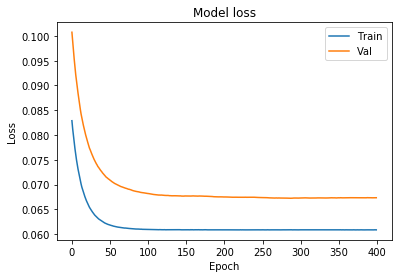

In [598]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [594]:
model = Sequential([
    Dense(28, activation='sigmoid', input_shape=(18,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
epochs=400
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#opt = model.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer='adam',
#model.compile(optimizer=opt,
model.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))

In [ ]:
model.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential

In [ ]:
#model = Sequential()
weights = model.get_weights()

In [ ]:
print(weights)

In [ ]:
model.summary()

In [ ]:
Xnew = [[2002, 1.9, 1], [2012, 2, 1], [2015, 2, 4]]
Xnew = [2002, 1.9, 1]
Xnew

In [614]:
df_t = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Sch_T2')
df_t.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun
0,Lingshui Semi,SEA CH,5,NOC,2,1,10439,EPC,700,3.100000,1,67166.666667,2,2,SEMI,980,2,0.148883,4,0.760000
1,Bohai Ming Zhu,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,1,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042
2,Petrojarl Varg,NE,1,OC,1,1,2240,EPC,816,0.460000,1,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765
3,Stybarrow Venture MV16,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,1,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875
4,Alima FPU,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,1,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133


In [615]:
df_t= df_t.drop('Unit Name', axis = 1)
df_t= df_t.drop('Schedule_Overrun', axis = 1)

In [616]:
df_t = pd.get_dummies(df_t)
dataset_t = df_t.values

# One-hot encode the data using pandas get_dummies

# Display the first 5 rows of the last 12 columns
#df.iloc[:,5:].head(5)
dataset_t

#Xnew = dataset_t[:,1:19]
#Xnew


array([[5., 2., 1., ..., 1., 0., 0.],
       [5., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.]])

In [617]:
dataset_t.shape

(127, 36)

In [618]:
Xnew = dataset_t[:,1:36]
Xnew

array([[2.0000e+00, 1.0000e+00, 1.0439e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.0000e+00, 4.3500e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.2400e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 1.0000e+00, 7.7290e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 1.0000e+00, 2.3980e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.8850e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [619]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale = min_max_scaler.fit_transform(Xnew)

In [621]:
ynew2 = model2.predict(Xnew_scale)

In [622]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew2[%s] = %s " % (loop,Xnew[loop],loop,ynew1[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [2.00000000e+00 1.00000000e+00 1.04390000e+04 7.00000000e+02
 3.10000000e+00 1.00000000e+00 6.71666667e+04 2.00000000e+00
 2.00000000e+00 9.80000000e+02 2.00000000e+00 1.48883375e-01
 4.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00], ynew2[0] = [0.2177259] 
Xnew[1] = [2.00e+00 1.00e+00 4.35e+03 2.59e+02 4.00e-01 1.00e+00 4.00e+04 1.00e+00
 2.00e+00 3.00e+01 1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00], ynew2[1] = [0.22765383] 
Xnew[2] = [1.00000000e+00 1.000

IndexError: index 106 is out of bounds for axis 0 with size 106

In [624]:
print(ynew2)
# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew2_df = pd.DataFrame (ynew2)
ynew2_df.to_excel(writer, '18')
# save the excel file
writer.save()

[[7.55091667e-01]
 [4.50771779e-01]
 [2.86732525e-01]
 [6.50462508e-03]
 [2.86760926e-03]
 [1.06256664e-01]
 [2.74972737e-01]
 [1.51020288e-03]
 [5.07399440e-03]
 [4.90439147e-01]
 [4.28923965e-01]
 [4.36652482e-01]
 [1.69631839e-03]
 [6.72712922e-03]
 [9.31274891e-03]
 [1.98083669e-01]
 [2.74429888e-01]
 [8.99290442e-02]
 [4.73234057e-02]
 [2.95117497e-03]
 [1.13519430e-01]
 [5.95990717e-02]
 [6.64986908e-01]
 [9.00623202e-03]
 [1.59880042e-01]
 [3.87434661e-02]
 [3.55118275e-01]
 [2.69834101e-02]
 [1.26285881e-01]
 [6.59585536e-01]
 [4.35808897e-01]
 [3.96761715e-01]
 [3.77796233e-01]
 [3.65995586e-01]
 [3.50248456e-01]
 [2.58389890e-01]
 [2.01697558e-01]
 [2.72724748e-01]
 [4.10862684e-01]
 [1.16363466e-01]
 [1.01134330e-01]
 [4.18339968e-02]
 [4.55198050e-01]
 [1.39744580e-02]
 [1.34601295e-02]
 [2.73045123e-01]
 [4.90200371e-01]
 [6.40920997e-01]
 [3.68103594e-01]
 [1.10449314e-01]
 [3.75878841e-01]
 [2.36062914e-01]
 [2.71329522e-01]
 [3.22663009e-01]
 [6.76634908e-02]
 [2.451348

In [625]:
ynew3 = model3.predict(Xnew_scale)

In [626]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew3[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [2.00000000e+00 1.00000000e+00 1.04390000e+04 7.00000000e+02
 3.10000000e+00 1.00000000e+00 6.71666667e+04 2.00000000e+00
 2.00000000e+00 9.80000000e+02 2.00000000e+00 1.48883375e-01
 4.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00], ynew3[0] = [0.22859916] 
Xnew[1] = [2.00e+00 1.00e+00 4.35e+03 2.59e+02 4.00e-01 1.00e+00 4.00e+04 1.00e+00
 2.00e+00 3.00e+01 1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00], ynew3[1] = [0.22847998] 
Xnew[2] = [1.00000000e+00 1.00

In [627]:
print(ynew3)

[[0.22859916]
 [0.22847998]
 [0.22792336]
 [0.22817472]
 [0.2280769 ]
 [0.22786003]
 [0.22839233]
 [0.22848225]
 [0.22836334]
 [0.22826937]
 [0.22853202]
 [0.2285335 ]
 [0.22847193]
 [0.22852087]
 [0.22860163]
 [0.22846052]
 [0.22833562]
 [0.22829047]
 [0.22850037]
 [0.2286934 ]
 [0.22845733]
 [0.22822273]
 [0.22839436]
 [0.2284196 ]
 [0.22841316]
 [0.22842127]
 [0.22815311]
 [0.22847879]
 [0.22845289]
 [0.22871706]
 [0.22859982]
 [0.2288307 ]
 [0.22883931]
 [0.22884268]
 [0.22884762]
 [0.22869506]
 [0.22846594]
 [0.22866729]
 [0.2286067 ]
 [0.22874951]
 [0.2287541 ]
 [0.22872093]
 [0.22863498]
 [0.2287941 ]
 [0.22879305]
 [0.22866592]
 [0.22864842]
 [0.22855902]
 [0.2288506 ]
 [0.2287791 ]
 [0.2288298 ]
 [0.2281816 ]
 [0.22872218]
 [0.22887045]
 [0.22880006]
 [0.22872302]
 [0.22802377]
 [0.22807398]
 [0.22853383]
 [0.2280648 ]
 [0.22772527]
 [0.22797033]
 [0.22807908]
 [0.22811237]
 [0.22808784]
 [0.22823319]
 [0.22820923]
 [0.22795644]
 [0.22807145]
 [0.2283895 ]
 [0.22848487]
 [0.22

In [628]:
Sch_Pred3 = pd.DataFrame(ynew2)
Sch_Pred3['18-2'] = pd.DataFrame(ynew3)

df_t = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Sch_T2')


Sch_Pred3['actual'] = df_t['Schedule_Overrun']

Sch_Pred3['Name'] = df_t['Unit Name']
print(Sch_Pred3)

            0      18-2    actual                    Name
0    0.755092  0.228599  0.760000           Lingshui Semi
1    0.450772  0.228480  0.471042          Bohai Ming Zhu
2    0.286733  0.227923  0.286765          Petrojarl Varg
3    0.006505  0.228175 -0.143875  Stybarrow Venture MV16
4    0.002868  0.228077 -0.022133               Alima FPU
..        ...       ...       ...                     ...
122  0.000923  0.228327 -0.088472              Shenzi TLP
123  0.000445  0.228379 -0.090164                Mars TLP
124  0.000155  0.228329 -0.125624             Olympus TLP
125  0.000401  0.228346 -0.081731                Ursa TLP
126  0.001510  0.228219  0.015301          Ram Powell TLP

[127 rows x 4 columns]


In [629]:
Sch_Pred3.to_excel("Sch_Pred3.xlsx")

In [ ]:
dataset

11 Features:
Region
Local Content
Lease/ Own
Planned_Cost
Hull Type
Technology Novelty
Type Unit
Water_Depth 
Lessons Learned
Oil/Gas
FEED Detail

Use only Region, Water Depth, Technology Novelty, and Lessons Learned

In [ ]:
#Reduce features as per pearson correlation
#X = dataset[:,[1, 2, 4, 9, 10, 13, 14, 15, 16, 17, 18]]
X = dataset[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]

print(X.shape)

In [ ]:
X

In [ ]:
Y = dataset[:,17]

In [ ]:
Y

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

In [ ]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [ ]:
Y

In [ ]:
for train, test in kfold.split(X_scale, Y):
# create model
	model4 = Sequential()
	model4.add(Dense(13, input_dim=13, activation='sigmoid'))
	model4.add(Dense(26, activation='sigmoid'))
	model4.add(Dense(8, activation='sigmoid'))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model4.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model4.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model5 = Sequential([
        Dense(26, activation='sigmoid', input_shape=(13,)),
        Dense(13, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model5.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model5.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model5.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

In [ ]:
model4.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_t2 = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T1')
df_t2.head()

In [ ]:
dataset_t2 = df_t2.values
Xnew2 = dataset_t2[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]
print(Xnew2.shape)
print(Xnew2)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew2)

In [ ]:
ynew4 = model4.predict(Xnew_scale2)
ynew5 = model5.predict(Xnew_scale2)

In [ ]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew4[loop]))

In [ ]:
print(ynew4)

7 Features:
Region
Local Content
Lease/ Own
Technology Novelty
Type Unit
Lessons Learned
FEED Detail

In [ ]:
#Reduce features further as per pearson correlation
X = dataset[:,[1, 2, 12, 13, 14, 16, 18]]

In [ ]:
Y = dataset[:,19]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
for train, test in kfold.split(X_scale, Y):
# create model
	model6 = Sequential()
	model6.add(Dense(12, input_dim=7, activation='relu'))
	model6.add(Dense(8, activation='relu'))
	model6.add(Dense(1, activation='sigmoid'))
	# Compile model
	model6.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model6.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model6.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model7 = Sequential([
        Dense(14, activation='sigmoid', input_shape=(7,)),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model7.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model7.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model7.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

In [ ]:
model6.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_t3 = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T1')
df_t3.head()

In [ ]:
dataset_t3 = df_t3.values
Xnew3 = dataset_t3[:,[1, 2, 4, 13, 14, 16, 18]]
Xnew3

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew3)

In [ ]:
ynew6 = model6.predict(Xnew_scale2)
ynew7 = model7.predict(Xnew_scale2)

In [ ]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew5[loop]))

In [ ]:
print(ynew6)

In [ ]:
print(type(ynew5))
print(ynew5.shape)
#print(range(ynew5))

#Cost_Pred3 = pd.DataFrame
Sch_Pred3 = pd.DataFrame(ynew1)
Sch_Pred3['18-2'] = pd.DataFrame(ynew3)
Sch_Pred3['13-1'] = pd.DataFrame(ynew4)
Sch_Pred3['13-2'] = pd.DataFrame(ynew5)
Sch_Pred3['7-1'] = pd.DataFrame(ynew6)
Sch_Pred3['7-2'] = pd.DataFrame(ynew7)
Sch_Pred3['actual'] = dataset_t[:,20]

Sch_Pred3['Name'] = df['Unit Name']
print(Sch_Pred3)

In [ ]:
Sch_Pred3.to_excel("Sch_Pred3.xlsx")